# Project: Road Accidents

## Table of contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>

## Introduction

> This a descriptive anaylsis on a fictional accident dataset. Lets take look the dataset.

In [52]:
## import necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import squarify

In [53]:
## import dataset
df = pd.read_csv('accidents.csv')
df.head(5)

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         5424 non-null    object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

> The dataset contains 21 columns and 307973 rows

<a id='cleaning'></a>

## Data Cleaning & Manipulation

* Drop the 'Day_of_Week' column.
* Correct 'Accident Date' datatype.
* Correct the spelling errrors found in the 'Accident_Severity' column.
* Group the 'Light_Conditions' column into Day and Night.
* Group 'Road_Surface_Conditions' into dry, wet and snow
* Group 'Vehicle_Type' column into car, van, bus,bike, tractor and others.
* Create year and month column from the 'Accident Date' column


In [55]:
## Drop the 'Day_of_Week' column.

df = df.drop(['Day_of_Week'], axis=1)

## Correct 'Accident Date' to a datetime datatype
df["Accident Date"] = pd.to_datetime(df["Accident Date"], errors="coerce")

In [56]:
## Correct the spelling errrors found in the 'Accident_Severity' column.
## first let's see the unique value in the column.

df['Accident_Severity'].unique()

array(['Serious', 'Slight', 'Fetal', 'Fatal'], dtype=object)

In [57]:
## Fetal should be Fatal
df['Accident_Severity'] = df['Accident_Severity'].replace({'Fetal':'Fatal'})
df['Accident_Severity'].unique()

array(['Serious', 'Slight', 'Fatal'], dtype=object)

In [58]:
## Group the 'Light_Conditions' column into Day and Night.
df['Light_Conditions'] = df['Light_Conditions'].replace({'Daylight':'Day', 
                                                         'Darkness - lights lit':'Night', 
                                                         'Darkness - lighting unknown':'Night',
                                                        'Darkness - lights unlit':'Night', 
                                                        'Darkness - no lighting':'Night'})
df['Light_Conditions'].unique()

array(['Day', 'Night'], dtype=object)

In [59]:
##  Group 'Road_Surface_Conditions' into dry, wet and snow
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].replace({'Dry':'Dry', 
                                                                       'Wet or damp':'Wet', 
                                                                       'Frost or ice':'Snow', 
                                                                       'Snow':'Snow',
                                                                        'Flood over 3cm. deep':'Wet'})
df['Road_Surface_Conditions'].unique()

array(['Dry', 'Wet', 'Snow', nan], dtype=object)

In [60]:
## Group 'Vehicle_Type' column into car, van, bus,bike, tractor and others.
df['Vehicle_Type'] = df['Vehicle_Type'].replace({'Car':'Car', 
                                                 'Taxi/Private hire car':'Car',
                                                'Motorcycle over 500cc':'Bike',
                                                'Van / Goods 3.5 tonnes mgw or under':'Van',
                                                'Goods over 3.5t. and under 7.5t':'Van', 
                                                'Motorcycle 125cc and under':'Bike',
                                                'Motorcycle 50cc and under':'Bike',
                                                'Bus or coach (17 or more pass seats)':'Bus',
                                                'Goods 7.5 tonnes mgw and over':'Van', 
                                                'Other vehicle':'Others',
                                                'Motorcycle over 125cc and up to 500cc':'Bike', 
                                                'Agricultural vehicle':'Tractor',
                                                'Minibus (8 - 16 passenger seats)':'Bus', 
                                                'Pedal cycle':'Bike', 
                                                'Ridden horse':'Others'})
df['Vehicle_Type'].unique()

array(['Car', 'Bike', 'Van', 'Bus', 'Others', 'Tractor'], dtype=object)

In [61]:
## Create year and month column from the 'Accident Date' column

## month number
df['month_num'] = df['Accident Date'].dt.month

## month name
df['month'] = df['Accident Date'].dt.strftime('%B')

## year
df['year'] = df['Accident Date'].dt.year


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident_Index              307973 non-null  object        
 1   Accident Date               307973 non-null  datetime64[ns]
 2   Junction_Control            307973 non-null  object        
 3   Junction_Detail             307973 non-null  object        
 4   Accident_Severity           307973 non-null  object        
 5   Latitude                    307973 non-null  float64       
 6   Light_Conditions            307973 non-null  object        
 7   Local_Authority_(District)  307973 non-null  object        
 8   Carriageway_Hazards         5424 non-null    object        
 9   Longitude                   307973 non-null  float64       
 10  Number_of_Casualties        307973 non-null  int64         
 11  Number_of_Vehicles          307973 non-

> Three columns have been add. Now to explore the data

<a id='eda'></a>

## Exploratory Data Analysis
### To-do list

* Total casualties?
* Which severity has the highest number of casualties?
* Vehicle with the highest casualties?
* What month were most casualties recorded
* Total casualties by road type
* Total casualties by road surface
* Total casualties by location
* Total casualties by light condition.

##### To-do 1

>Total Casualties

In [63]:
Total_casualties = df['Number_of_Casualties'].sum()
Total_Accidents = df['Accident_Index'].size
print('Total Casualties: ' + str(Total_casualties))
print('Total Accidents: ' + str(Total_Accidents))

Total Casualties: 417883
Total Accidents: 307973


##### To-do 2

> Total Casualties by Accident Severity

In [64]:
severity_pivot = df.pivot_table(values='Number_of_Casualties', index='Accident_Severity', aggfunc='sum')
severity_pivot

,Number_of_Casualties
Accident_Severity,
Fatal,7135
Serious,59312
Slight,351436


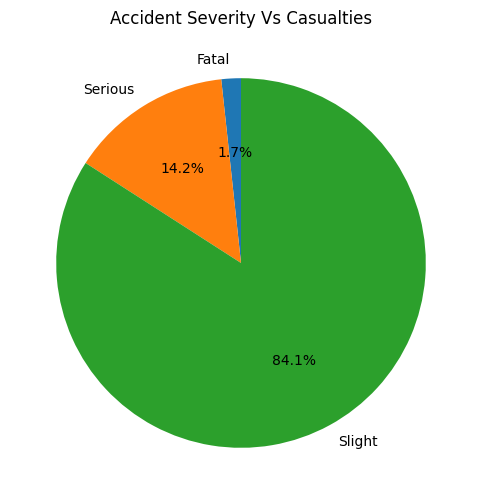

In [65]:
labels = severity_pivot.index
sizes = severity_pivot['Number_of_Casualties']

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90) ##, colors=plt.cm.Paired.colors)
plt.title('Accident Severity Vs Casualties')
plt.show()

##### To-do 3

> Which Vechile type has the highest number of casualties?

In [66]:
vehicle_pivot = df.pivot_table(values='Number_of_Casualties', index='Vehicle_Type', aggfunc='sum')
vehicle_pivot

,Number_of_Casualties
Vehicle_Type,
Bike,33764
Bus,12798
Car,333485
Others,3332
Tractor,1032
Van,33472


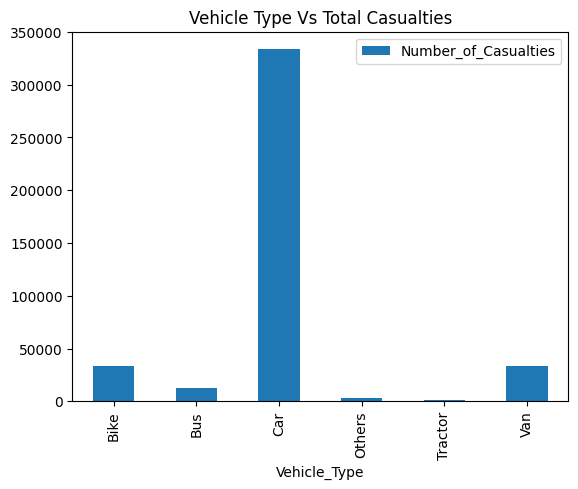

In [67]:
vehicle_pivot.plot(kind='bar')
plt.title('Vehicle Type Vs Total Casualties')
plt.show()

##### To-do 4

> What month were most casualties recorded?

In [68]:
month_pivot = df.pivot_table(values='Number_of_Casualties', index=['month_num','month'], columns='year', aggfunc='sum')
month_pivot = month_pivot.reset_index()
month_pivot

year,month_num,month,2021,2022
0,1,January,18173,13163
1,2,February,14648,14804
2,3,March,17815,16575
3,4,April,17335,15767
4,5,May,18852,16775
5,6,June,18728,17230
6,7,July,19682,17201
7,8,August,18797,16796
8,9,September,18456,17500
9,10,October,20109,18287


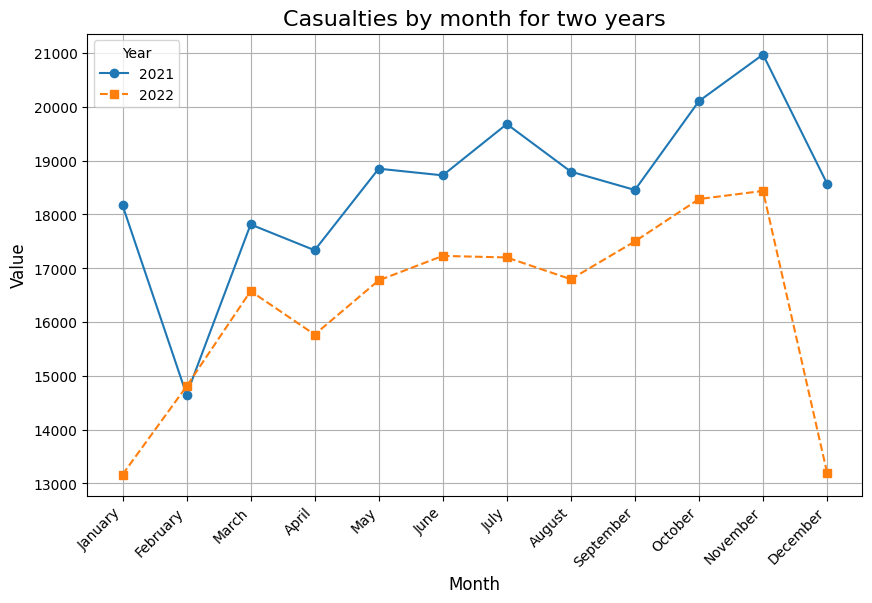

In [69]:
# Plot the line chart
plt.figure(figsize=(10, 6))

# Plot for each year
plt.plot(month_pivot['month'], month_pivot[2021], marker='o', label="2021")
plt.plot(month_pivot['month'], month_pivot[2022], marker='s', linestyle='--', label="2022")

# Add chart elements
plt.title("Casualties by month for two years", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Year")
plt.grid(True)

##### To-do 5

> Total casualties by road type

In [70]:
road_pivot = df.pivot_table(values='Number_of_Casualties', index='Road_Type', aggfunc='sum')
road_pivot = road_pivot.sort_values(by='Number_of_Casualties', ascending=True)
road_pivot

,Number_of_Casualties
Road_Type,
Slip road,4679
One way street,7389
Roundabout,26828
Dual carriageway,67368
Single carriageway,309698


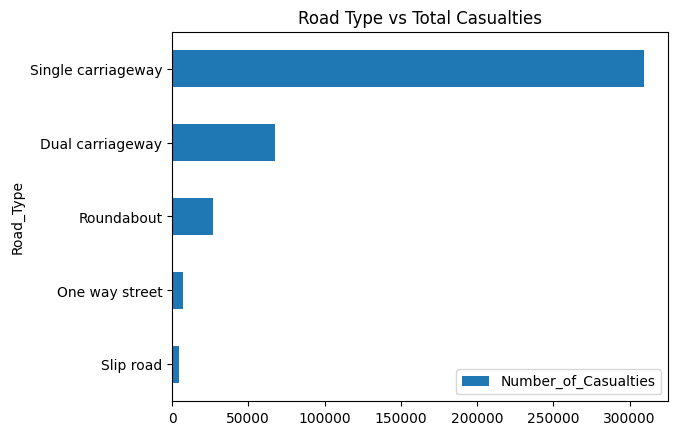

In [71]:
road_pivot.plot(kind='barh')
plt.title('Road Type vs Total Casualties')
plt.show()

##### To-do 6

> Total casualties by road surface.

In [72]:
surface_pivot = df.pivot_table(values='Number_of_Casualties', index='Road_Surface_Conditions', aggfunc='sum')
surface_pivot

,Number_of_Casualties
Road_Surface_Conditions,
Dry,279445
Snow,22781
Wet,115261


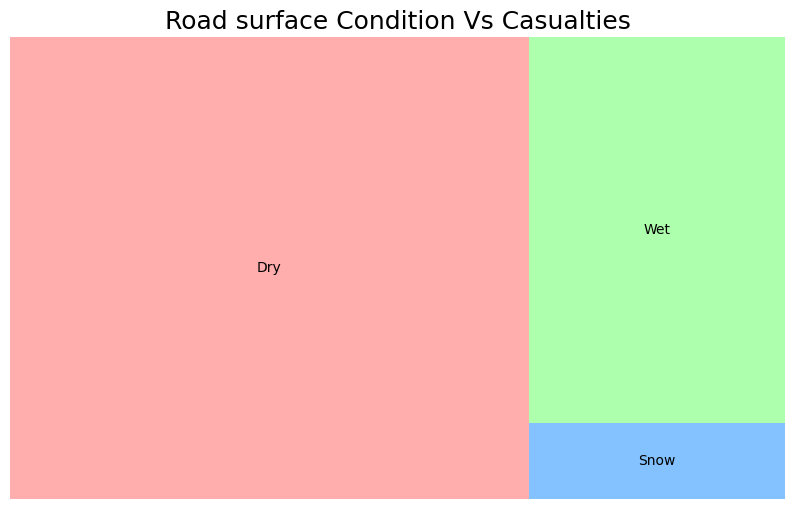

In [73]:
# Example data
labels = surface_pivot.index
sizes = surface_pivot.values
colors = ["#ff9999", "#66b3ff", "#99ff99"]

# Create a treemap
plt.figure(figsize=(10, 6))
squarify.plot(
    sizes=sizes,
    label=labels,
    color=colors,
    alpha=0.8
)
plt.axis("off")  # Remove axes for better visualization

# Title and show
plt.title("Road surface Condition Vs Casualties", fontsize=18)
plt.show()

##### To-do 7

> Total casualties by light conditions

In [74]:
light_pivot = df.pivot_table(values='Number_of_Casualties', index='Light_Conditions', aggfunc='sum')
light_pivot

,Number_of_Casualties
Light_Conditions,
Day,304963
Night,112920


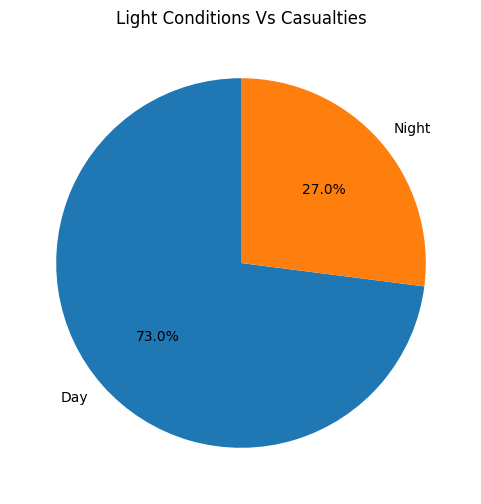

In [75]:
labels = light_pivot.index
sizes = light_pivot['Number_of_Casualties']

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90) ##, colors=plt.cm.Paired.colors)
plt.title('Light Conditions Vs Casualties')
plt.show()

##### To-do 8

> Total casualties by location.

In [76]:
location_pivot = df.pivot_table(values='Number_of_Casualties', index='Urban_or_Rural_Area', aggfunc='sum')
location_pivot

,Number_of_Casualties
Urban_or_Rural_Area,
Rural,162019
Urban,255864


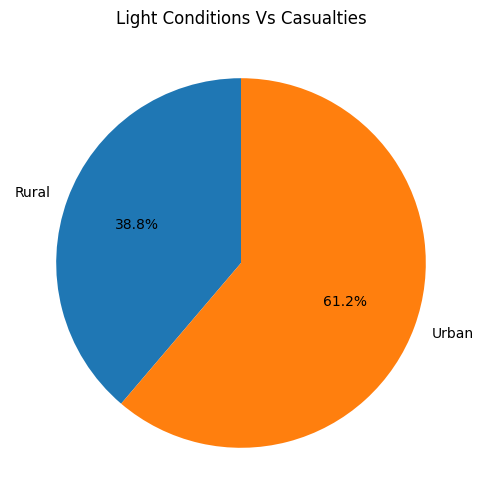

In [77]:
labels = location_pivot.index
sizes = location_pivot['Number_of_Casualties']

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90) ##, colors=plt.cm.Paired.colors)
plt.title('Light Conditions Vs Casualties')
plt.show()